# Formação 2 - Machine Learning Development in Python
---
*João Brazuna*

## Apresentação dos Conjuntos de Dados
---
Nesta formação, usaremos maioritariamente dois conjuntos de dados reais e de acesso livre:

### [**Titanic**](https://www.kaggle.com/competitions/titanic/data)
<img src="images/Titanic.jpg" width="200">

Os dados do Titanic contêm informação real sobre os passageiros e a indicação se o passageiro sobreviveu ou não, que é aquilo que se pretende que seja previsto.

|  ID  | Variável    | Descrição                                 | Valores                                                              |
| ---: | :----       | :----                                     | :---                                                                 |
|    0 | PassengerId | ID do Passageiro                          | 1, 2, 3,..., 891                                                     |
|    1 | Survival    | Indicatriz da Sobrevivência do Passageiro | 1 se o passageiro tiver sobrevivido, 0 caso contrário                |
|    2 | Pclass      | Classe Económica do Passageiro            | 1 para 1ª classe, 2 para 2ª classe e 3 para passageiros de 3ª classe |
|    3 | Name        | Nome do Passageiro                        | Nome do passageiro, incluindo o título (Mr., Miss., Mrs.,...)        |
|    4 | Sex         | Género do Passageiro                      | "male" ou "female"                                                   |
|    5 | Age         | Idade do Passageiro em Anos               | 0.42, 0.67, 0.75, 0.83, 0.92, 1, 2,...                               |
|    6 | SibSp       | Número de Irmãos e Cônjuges no Titanic    | 0, 1, 2,...                                                          |
|    7 | Parch       | Número de Pais e Filhos no Titanic        | 0, 1, 2,...                                                          |
|    8 | Ticket      | Número do Bilhete                         | "A/5 21171", "PC 17599", "STON/O2. 3101282",...                      |
|    9 | Fare        | Preço do Bilhete                          | 0, 4.0125, 5, 6.2375,...                                             |
|   10 | Cabin       | Camarote onde ficou o Passageiro          | "C85", "C123", "E46",...                                             |
|   11 | Embarked    | Porto onde o Passageiro Embarcou          | "C" para Cherbourg, "Q" para Queenstown ou "S" para Southampton      |

### [**Desempenho dos Alunos**](https://archive.ics.uci.edu/ml/datasets/student%2Bperformance)
<img src="images/PTMAT.jpg" width="200">

Contém dados sobre alunos de duas escolas portuguesas, incluindo as suas notas das disciplinas de Português e Matemática nos 3 períodos. O objectivo é prever a nota final de cada aluno numa das disciplinas.


| ID  | Variável    | Descrição                                 | Valores            |
| ---: | :---- | :---- | :--- |
|  1 | school     | Escola do Aluno                          | "GP" - Gabriel Pereira ou "MS" - Mousinho da Silveira|
|  2 | sex        | Género do Aluno                          | "F" - feminino ou "M" - masculino |
|  3 | age        | Idade do Aluno                           | De 15 a 22 |
|  4 | address    | Tipo de Localidade de Residência         | "U" - urbana ou "R" - rural |
|  5 | famsize    | Tamanho da Família                       | "LE3" - menor ou igual a 3 ou "GT3" - maior que 3 |
|  6 | Pstatus    | Estado de Coabitação dos Pais            | "T" - juntos ou "A" - separados |
|  7 | Medu       | Educação da Mãe                          | 0 - Nenhuma,  1 - Educação Primária (4º Ano), 2 – 5º ao 9º Ano, 3 – Educação Secundária ou 4 – Educação Superior |
|  8 | Fedu       | Educação do Pai                          | 0 - Nenhuma,  1 - Educação Primária (4º Ano), 2 – 5º ao 9º Ano, 3 – Educação Secundária ou 4 – Educação Superior |
|  9 | Mjob       | Emprego da Mãe                           | "teacher" - Professora, "health" - Área da Saúde, "services" - Serviços Públicos ou Administrativos, "at_home" - Doméstica ou "other" - Outros |
| 10 | Fjob       | Emprego do Pai                           | "teacher" - Professor, "health" - Área da Saúde, "services" - Serviços Públicos ou Administrativos, "at_home" - Doméstico ou "other" - Outros |
| 11 | reason     | Razão para ter escolhido a escola        | "home" - Perto de casa, "reputation" - Reputação da Escola, "course" - Preferência pelo curso ou "other" - Outros |
| 12 | guardian   | Encarregado de Educação                  | "mother" - Mãe, "father" - Pai ou "other" - Outro |
| 13 | traveltime | Tempo de Viagem Casa - Escola            | 1 - <15 min., 2 - 15 a 30 min., 3 - 30 min. a 1 hora, ou 4 - >1 hora |
| 14 | studytime  | Tempo de Estudo por Semana               | 1 - <2 horas, 2 - 2 a 5 horas, 3 - 5 a 10 horas, ou 4 - >10 horas |
| 15 | failures   | Número de Chumbos Anteriores             | n se 1<=n<3, caso contrário 4 |
| 16 | schoolsup  | Suporte Educacional Extra                | "yes" - Sim, ou "no" - Não |
| 17 | famsup     | Suporte Educacional por parte da Família | "yes" - Sim, ou "no" - Não |
| 18 | paid       | Aulas Pagas Extra da Disciplina          | "yes" - Sim, ou "no" - Não |
| 19 | activities | Actividades Extra-curriculares           | "yes" - Sim, ou "no" - Não |
| 20 | nursery    | Frequentou a Pré-Primária                | "yes" - Sim, ou "no" - Não |
| 21 | higher     | Pretende seguir para o Ensino Superior   | "yes" - Sim, ou "no" - Não |
| 22 | internet   | Tem acesso à Internet em Casa            | "yes" - Sim, ou "no" - Não |
| 23 | romantic   | Encontra-se numa Relação Amorosa         | "yes" - Sim, ou "no" - Não |
| 24 | famrel     | Qualidade das Relações Familiares        | De 1 - Muito Má a 5 - Muito Boa |
| 25 | freetime   | Tempo Livre depois da Escola             | De 1 - Muito Pouco a 5 - Muito |
| 26 | goout      | Saídas com Amigos                        | De 1 - Pouco Frequentes a 5 - Muito Frequentes |
| 27 | Dalc       | Consumo de Álcool durante a Semana       | De 1 - Pouco Frequente a 5 - Muito Frequente |
| 28 | Walc       | Consumo de Álcool ao Fim-de-Semana       | De 1 - Pouco Frequente a 5 - Muito Frequente |
| 29 | health     | Estado de Saúde Actual                   | De 1 - Muito Mau a 5 - Muito Bom |
| 30 | absences   | Número de Faltas à Escola                | De 0 a 93 |
| **31** | **G1** | Nota Final da Disciplina no 1º Período   | De 0 a 20 |
| **31** | **G2** | Nota Final da Disciplina no 2º Período   | De 0 a 20 |
| **32** | **G3** | Nota Final da Disciplina no 3º Período   | De 0 a 20, **variável a prever** |

*Nota Adicional*: há 382 estudantes comuns a ambos os conjuntos de dados. Estes estudantes podem ser identificados procurando atributos idênticos que os caracterizem.

## Importar Pacotes Necessários
---

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression

import statsmodels.api as sm

## Exemplo de Regressão Linear Simples
---

In [3]:
X = pd.DataFrame({'1': [1] * 12,
                  'X': [32, 48, 72, 64, 48, 16, 40, 48, 48, 24, 80, 56]})
X

,1,X
0,1,32
1,1,48
2,1,72
3,1,64
4,1,48
5,1,16
6,1,40
7,1,48
8,1,48
9,1,24


In [4]:
y = pd.Series([230, 262, 323, 298, 255, 199, 248, 279, 267, 214, 359, 305])
y

0     230
1     262
2     323
3     298
4     255
5     199
6     248
7     279
8     267
9     214
10    359
11    305
dtype: int64

In [5]:
np.matmul((X.T).values, X.values)

array([[   12,   576],
       [  576, 31488]], dtype=int64)

In [6]:
np.linalg.inv(np.matmul((X.T).values, X.values))

array([[ 6.83333333e-01, -1.25000000e-02],
       [-1.25000000e-02,  2.60416667e-04]])

In [7]:
np.matmul((X.T).values, y.values)

array([  3239, 164752], dtype=int64)

In [8]:
np.matmul(np.linalg.inv(np.matmul((X.T).values, X.values)), np.matmul((X.T).values, y.values))

array([153.91666667,   2.41666667])

## Carregar os Dados
---

In [9]:
titanic_df = pd.read_csv('data/Titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
students_df = pd.read_csv('data/students.csv')
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,paid_por,activities_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,studytime
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,1,1,3,4,0,11,11,4
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,no,1,1,3,2,9,11,11,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,no,no,2,3,3,6,12,13,12,4
3,GP,F,15,U,GT3,T,4,2,health,services,...,no,yes,1,1,5,0,14,14,14,6
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,1,2,5,0,11,13,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,F,19,R,GT3,T,2,3,services,other,...,no,yes,1,2,5,4,10,11,10,6
366,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,no,1,1,1,4,15,15,16,4
367,MS,F,18,U,GT3,T,1,1,other,other,...,no,yes,1,1,5,6,11,12,9,4
368,MS,M,17,U,LE3,T,3,1,services,services,...,no,no,3,4,2,6,10,10,10,2


## Regressão Linear - Prever Nota Final a Matemática
---

In [11]:
numeric_vars = students_df.dtypes[students_df.dtypes != 'object'].index.to_list()
numeric_vars

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'famrel',
 'freetime',
 'goout',
 'studytime_mat',
 'failures_mat',
 'Dalc_mat',
 'Walc_mat',
 'health_mat',
 'absences_mat',
 'G1_mat',
 'G2_mat',
 'G3_mat',
 'studytime_por',
 'failures_por',
 'Dalc_por',
 'Walc_por',
 'health_por',
 'absences_por',
 'G1_por',
 'G2_por',
 'G3_por',
 'studytime']

In [12]:
X = students_df[['school'] + numeric_vars].drop('G3_mat', axis=1)
y = students_df['G3_mat']
X

,school,age,Medu,Fedu,traveltime,famrel,freetime,goout,studytime_mat,failures_mat,...,studytime_por,failures_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,studytime
0,GP,18,4,4,2,4,3,4,2,0,...,2,0,1,1,3,4,0,11,11,4
1,GP,17,1,1,1,5,3,3,2,0,...,2,0,1,1,3,2,9,11,11,4
2,GP,15,1,1,1,4,3,2,2,3,...,2,0,2,3,3,6,12,13,12,4
3,GP,15,4,2,1,3,2,2,3,0,...,3,0,1,1,5,0,14,14,14,6
4,GP,16,3,3,1,4,3,2,2,0,...,2,0,1,2,5,0,11,13,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,MS,19,2,3,1,5,4,2,3,1,...,3,1,1,2,5,4,10,11,10,6
366,MS,18,3,1,1,4,3,4,2,0,...,2,0,1,1,1,4,15,15,16,4
367,MS,18,1,1,2,1,1,1,2,1,...,2,0,1,1,5,6,11,12,9,4
368,MS,17,3,1,2,2,4,5,1,0,...,1,0,3,4,2,6,10,10,10,2


In [13]:
X['school'].value_counts()

GP    331
MS     39
Name: school, dtype: int64

In [14]:
X['school'] = pd.get_dummies(X['school'], drop_first=True)['MS']
X

,school,age,Medu,Fedu,traveltime,famrel,freetime,goout,studytime_mat,failures_mat,...,studytime_por,failures_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por,studytime
0,0,18,4,4,2,4,3,4,2,0,...,2,0,1,1,3,4,0,11,11,4
1,0,17,1,1,1,5,3,3,2,0,...,2,0,1,1,3,2,9,11,11,4
2,0,15,1,1,1,4,3,2,2,3,...,2,0,2,3,3,6,12,13,12,4
3,0,15,4,2,1,3,2,2,3,0,...,3,0,1,1,5,0,14,14,14,6
4,0,16,3,3,1,4,3,2,2,0,...,2,0,1,2,5,0,11,13,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,1,19,2,3,1,5,4,2,3,1,...,3,1,1,2,5,4,10,11,10,6
366,1,18,3,1,1,4,3,4,2,0,...,2,0,1,1,1,4,15,15,16,4
367,1,18,1,1,2,1,1,1,2,1,...,2,0,1,1,5,6,11,12,9,4
368,1,17,3,1,2,2,4,5,1,0,...,1,0,3,4,2,6,10,10,10,2


In [15]:
y

0       6
1       6
2      10
3      15
4      10
       ..
365     0
366     8
367     0
368    16
369    10
Name: G3_mat, Length: 370, dtype: int64

In [16]:
lm = sm.OLS(y, sm.add_constant(X))
res = lm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 G3_mat   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     90.78
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.96e-127
Time:                        19:11:12   Log-Likelihood:                -744.19
No. Observations:                 370   AIC:                             1532.
Df Residuals:                     348   BIC:                             1618.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1946      1.787      0.109      0.913      -3.321       3.710
school            0.3357      0.368      0.912      0.363      -0.389       1.060
age              -0.2880      0.099     -2.912      0.004      -0.483      -0.093
Medu              0.0456      0.121      0.377      0.707      -0.193       0.284
Fedu             -0.0976      0.119     -0.820      0.413      -0.332       0.137
traveltime        0.0736      0.151      0.487      0.626      -0.223       0.370
famrel            0.3462      0.112      3.103      0.002       0.127       0.566
freetime          0.0241      0.108      0.223      0.823      -0.188       0.236
goout             0.0859      0.103      0.837      0.403      -0.116       0.288
studytime_mat    -0.0315      0.021     -1.511      0.132      -0.073       0.009
failures_mat     -0.2528      0.175     -1.448      0.149      -0.596       0.091
Dalc_mat         -0.0251      0.075     -0.335      0.738      -0.173       0.122
Walc_mat          0.0695      0.055      1.259      0.209      -0.039       0.178
health_mat        0.0392      0.036      1.090      0.277      -0.032       0.110
absences_mat      0.0647      0.016      4.144      0.000       0.034       0.095
G1_mat            0.1276      0.061      2.085      0.038       0.007       0.248
G2_mat            0.9418      0.053     17.724      0.000       0.837       1.046
studytime_por    -0.0315      0.021     -1.511      0.132      -0.073       0.009
failures_por      0.3043      0.249      1.220      0.223      -0.186       0.795
Dalc_por         -0.0251      0.075     -0.335      0.738      -0.173       0.122
Walc_por          0.0695      0.055      1.259      0.209      -0.039       0.178
health_por        0.0392      0.036      1.090      0.277      -0.032       0.110
absences_por     -0.0588      0.025     -2.366      0.019      -0.108      -0.010
G1_por           -0.0415      0.087     -0.476      0.634      -0.213       0.130
G2_por            0.1397      0.116      1.208      0.228      -0.088       0.367
G3_por            0.0279      0.077      0.361      0.718      -0.124       0.179
studytime        -0.0630      0.042     -1.511      0.132      -0.145       0.019
==============================================================================
Omnibus:                      184.265   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.848
Skew:                          -2.144   Prob(JB):                    1.22e-202
Kurtosis:                       9.475   Cond. No.                     1.01e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.15e-27. This mig

In [17]:
initial_X = X.copy()

In [18]:
vars_to_delete = ['G3_por', 'freetime', 'Dalc_mat', 'Dalc_por', 'G1_por', 'Medu', 'traveltime', 'Fedu', 'goout', 'health_por', 'health_mat', 'failures_por', 'failures_mat', 'studytime', 'studytime_por']
vars_to_keep = [x for x in numeric_vars if x not in vars_to_delete + ['G3_mat']]
X = initial_X[['school'] + vars_to_keep]

In [19]:
lm2 = sm.OLS(y, sm.add_constant(X))
res2 = lm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 G3_mat   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     193.0
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          8.65e-138
Time:                        19:11:12   Log-Likelihood:                -747.11
No. Observations:                 370   AIC:                             1516.
Df Residuals:                     359   BIC:                             1559.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0248      1.589      0.016      0.988      -3.101       3.150
school            0.3096      0.345      0.896      0.371      -0.370       0.989
age              -0.2568      0.092     -2.795      0.005      -0.438      -0.076
famrel            0.3895      0.108      3.620      0.000       0.178       0.601
studytime_mat    -0.1857      0.122     -1.528      0.127      -0.425       0.053
Walc_mat          0.0786      0.041      1.929      0.054      -0.002       0.159
absences_mat      0.0631      0.015      4.180      0.000       0.033       0.093
G1_mat            0.1413      0.058      2.435      0.015       0.027       0.255
G2_mat            0.9430      0.051     18.430      0.000       0.842       1.044
Walc_por          0.0786      0.041      1.929      0.054      -0.002       0.159
absences_por     -0.0601      0.024     -2.487      0.013      -0.108      -0.013
G2_por            0.1102      0.052      2.098      0.037       0.007       0.213
==============================================================================
Omnibus:                      192.267   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1023.381
Skew:                          -2.235   Prob(JB):                    5.96e-223
Kurtosis:                       9.812   Cond. No.                     5.77e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.32e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [20]:
y.mean()

10.464864864864865

In [21]:
y.sample(frac=0.2, replace=False, random_state=123).mean()

10.743243243243244

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(296, 11) (74, 11) (296,) (74,)


In [23]:
y_train.mean()

10.39527027027027

In [24]:
y_test.mean()

10.743243243243244

In [25]:
lm3 = sm.OLS(y_train, sm.add_constant(X_train))
res3 = lm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 G3_mat   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     151.7
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          6.73e-108
Time:                        19:11:13   Log-Likelihood:                -596.84
No. Observations:                 296   AIC:                             1216.
Df Residuals:                     285   BIC:                             1256.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6188      1.827      0.339      0.735      -2.978       4.216
school            0.5480      0.382      1.433      0.153      -0.205       1.301
age              -0.2734      0.107     -2.544      0.011      -0.485      -0.062
famrel            0.4545      0.118      3.853      0.000       0.222       0.687
studytime_mat    -0.2738      0.131     -2.086      0.038      -0.532      -0.015
Walc_mat          0.0671      0.046      1.457      0.146      -0.024       0.158
absences_mat      0.0651      0.016      3.950      0.000       0.033       0.098
G1_mat            0.1253      0.065      1.942      0.053      -0.002       0.252
G2_mat            0.9458      0.055     17.222      0.000       0.838       1.054
Walc_por          0.0671      0.046      1.457      0.146      -0.024       0.158
absences_por     -0.0731      0.027     -2.733      0.007      -0.126      -0.020
G2_por            0.0990      0.060      1.661      0.098      -0.018       0.216
==============================================================================
Omnibus:                      164.938   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              948.683
Skew:                          -2.320   Prob(JB):                    9.91e-207
Kurtosis:                      10.443   Cond. No.                     6.46e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.28e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
res3.params

const            0.618773
school           0.548004
age             -0.273356
famrel           0.454528
studytime_mat   -0.273818
Walc_mat         0.067149
absences_mat     0.065083
G1_mat           0.125314
G2_mat           0.945772
Walc_por         0.067149
absences_por    -0.073133
G2_por           0.098954
dtype: float64

In [27]:
new_X_test = X_test.assign(const=1)
new_X_test = new_X_test[['const'] + X_test.columns.difference(['const']).to_list()]
new_X_test

,const,G1_mat,G2_mat,G2_por,Walc_mat,Walc_por,absences_mat,absences_por,age,famrel,school,studytime_mat
59,1,15,16,15,1,1,2,2,16,4,0,2
245,1,6,8,8,4,4,0,8,18,4,0,1
9,1,14,15,12,1,1,0,0,15,5,0,2
300,1,8,8,12,2,2,0,2,18,5,0,2
291,1,10,8,14,2,2,10,0,18,4,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
301,1,9,10,15,1,1,9,2,18,4,0,3
196,1,8,10,12,3,3,6,4,16,4,0,2
218,1,12,13,9,5,5,0,9,18,3,0,2
6,1,12,12,12,1,1,0,0,16,4,0,2


In [28]:
np.round(np.matmul(new_X_test.values, res3.params.values), 0)

array([27., 23., 24., 26., 28., 25., 25., 25., 22., 28., 27., 27., 30.,
       23., 28., 28., 27., 27., 26., 29., 29., 27., 26., 27., 25., 27.,
       24., 26., 22., 24., 28., 30., 28., 27., 24., 29., 29., 27., 23.,
       23., 24., 22., 22., 29., 26., 28., 28., 31., 24., 27., 23., 26.,
       22., 26., 27., 25., 27., 25., 23., 27., 21., 20., 24., 33., 23.,
       22., 23., 23., 24., 28., 24., 25., 25., 27.])

In [29]:
lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4.score(X_train, y_train)

0.8418691760425664

In [30]:
lm4.score(X_test, y_test)

0.8419791248949797

In [31]:
y_pred = lm4.predict(X_test)
y_pred

array([16.13012066,  6.30447528, 15.50615642,  7.30182878,  8.09293707,
        8.00391787,  8.89330083,  3.076151  ,  3.95082862, 13.80671301,
       18.0824697 ,  9.13709649, 13.74784874, 12.15409825,  6.54867977,
       18.60684108, 12.26260612, 15.27789279, 11.02130951, 18.66504871,
       10.38659511,  6.55001162,  7.71474782, 11.02838391, 15.14887646,
        8.95971725, 13.20090662, 16.6314989 , 10.02540945,  4.19257124,
       -2.03527793, 11.46409173, 10.65257966, 11.75792145,  8.48686756,
       11.66105896,  9.15019909, 14.22831444,  5.62110751, 11.35190772,
       14.07949571,  9.35122668,  6.13059964, 15.81025883, 15.29473828,
       18.94254444, 14.5569205 , 17.70504367, 12.93157461, 16.52393862,
        4.08847702, 17.65670611, 14.18056835, 10.70517175, 11.26950277,
        8.08513817,  8.23205912, 11.91690315,  9.89435091,  9.24757004,
        9.33716722,  7.35258867, 12.8399478 , 10.33020817,  5.92182767,
       11.82494583,  9.31056754, 13.45428749,  6.56240796,  9.33

In [32]:
final_test = X_test.assign(**{'Actual': y_test, 'Estimate': y_pred})
final_test

,school,age,famrel,studytime_mat,Walc_mat,absences_mat,G1_mat,G2_mat,Walc_por,absences_por,G2_por,Actual,Estimate
59,0,16,4,2,1,2,15,16,1,2,15,16,16.130121
245,0,18,4,1,4,0,6,8,4,8,8,8,6.304475
9,0,15,5,2,1,0,14,15,1,0,12,15,15.506156
300,0,18,5,2,2,0,8,8,2,2,12,0,7.301829
291,0,18,4,2,2,10,10,8,2,0,14,8,8.092937
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,0,18,4,3,1,9,9,10,1,2,15,9,9.338655
196,0,16,4,2,3,6,8,10,3,4,12,10,9.664091
218,0,18,3,2,5,0,12,13,5,9,9,13,11.216995
6,0,16,4,2,1,0,12,12,1,0,12,11,11.690327


In [33]:
class ConfusionMatrix():
    def __init__(self, y_real, y_pred):
        if (len(np.intersect1d(y_real, [1, 0])) != 2) or len(y_real.unique()) != 2:
            raise ValueError(f"y_real parameter can only take levels 1 or 0.")
        cm = confusion_matrix(y_real, y_pred, labels=[1, 0])
        cm_df = pd.DataFrame(cm, index=['Real Positive', 'Real Negative'], columns=['Predicted Positive', 'Predicted Negative'])
        self._confusion_matrix = cm_df
    
    @property
    def confusion_matrix(self):
        return self._confusion_matrix
    
    @property
    def tp(self):
        return self.confusion_matrix.loc['Real Positive', 'Predicted Positive']
    
    @property
    def tn(self):
        return self.confusion_matrix.loc['Real Negative', 'Predicted Negative']
    
    @property
    def fp(self):
        return self.confusion_matrix.loc['Real Negative', 'Predicted Positive']
    
    @property
    def fn(self):
        return self.confusion_matrix.loc['Real Positive', 'Predicted Negative']
    
    @property
    def positive(self):
        return self.confusion_matrix.loc['Real Positive', :].sum()
    
    @property
    def negative(self):
        return self.confusion_matrix.loc['Real Negative', :].sum()
    
    @property
    def predicted_positive(self):
        return self.confusion_matrix.loc[:, 'Predicted Positive'].sum()
    
    @property
    def predicted_negative(self):
        return self.confusion_matrix.loc[:, 'Predicted Negative'].sum()
    
    ## Performance Measures ##
    @property
    def accuracy(self):
        return (self.tp + self.tn) / (self.positive + self.negative)
    
    # Sensibility
    @property
    def sensibility(self):
        return self.tp / self.positive
    
    @property
    def recall(self):
        return self.sensibility
    
    @property
    def tpr(self):
        return self.sensibility
    
    # Specificity
    @property
    def specificity(self):
        return self.tn / self.negative
    
    @property
    def selectivity(self):
        return self.specificity
    
    @property
    def tpr(self):
        return self.specificity
    
    # False Positive Rate
    @property
    def fpr(self):
        return 1 - self.specificity
    
    # False Negative Rate
    @property
    def fnr(self):
        return 1 - self.sensitivity
    
    # PPV / Precision
    @property
    def precision(self):
        return self.tp / self.predicted_positive
    
    @property
    def ppv(self):
        return self.precision
    
    # NPV
    @property
    def npv(self):
        return self.tn / self.predicted_negative
    
    # False Discovery Rate
    @property
    def fdr(self):
        return 1 - self.ppv
    
    # False Omission Rate
    @property
    def fomr(self):
        return 1 - self.npv
    
    # Performance Measures
    @property
    def performance_measures(self):
        pm_dct = {'Accuracy': self.accuracy,
                  'Precision / PPV': self.precision,
                  'Recall / Sensibility': self.sensibility,
                  'NPV': self.npv,
                  'Specificity': self.specificity}
        return pd.Series(pm_dct).to_frame('Performance Measures').T
    
    
def target_by_feature(x, target, data, fun='mean', bins=None,
                      xlabel=None, ylabel=None, title=None, targetlabels=None, 
                      xrotation=None, show=True):
    df = data.copy()
    df['Number of Observations'] = 1
    
    if isinstance(target, str):
        targets = [target]
    elif isinstance(target, list) and all([isinstance(y, str) for y in target]):
        targets = target
    else:
        raise ValueError(f"target argument can only be a string or a list of strings")
    
    if targetlabels is None:
        targetlabels = targets
    elif (isinstance(targetlabels, str) and len(targets) == 1):
        targetlabels = [targetlabels]
    elif ((isinstance(targetlabels, str) and len(targets) != 1)) or (isinstance(targetlabels, list) and (len(targetlabels) != len(targets))):
        raise ValueErrors(f"targetlabels argument must be a string if target is a string or a singleton list, or a list with the same number of elements as target.")

    if bins is not None:
        if isinstance(bins, list):
            if len(bins) != 3:
                raise ValueError(f"When a list, bins must be have 3 elements")
            bins = [df[x].min() - bins[2], *np.arange(bins[0], bins[1], bins[2]).tolist(), df[x].max()]     
            n_bins = len(bins)
        elif isinstance(bins, int):
            n_bins = bins
            
        unique_vals = df[x].unique()
        if len(unique_vals) > n_bins:
            df[x] = pd.cut(df[x], bins=bins)#.apply(lambda x: x.right)
    
    agg_funs = {'Number of Observations': 'sum'}
    for target in targets:
        agg_funs[target] = fun
    
    grp_df = df.groupby(x).agg(agg_funs).sort_index()
    grp_df['Number of Observations (%)'] = grp_df['Number of Observations'] / grp_df['Number of Observations'].sum() * 100
    grp_df.reset_index(inplace=True)
    
    ax = sns.barplot(x=x, y='Number of Observations (%)', data=grp_df, color='grey', alpha=0.4)
    ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))
    ylims = ax.get_ylim()
    y_adj = (ylims[1] - ylims[0]) / 100
    
    for ii, p in enumerate(ax.patches):
        txt = str(int(grp_df.iloc[ii]['Number of Observations']))
        txt_x = p.get_x() + p.get_width() / 2
        txt_y = p.get_height() + y_adj
        ax.text(txt_x, txt_y, txt, ha='center')
    
    ax2 = ax.twinx()
    
    for target in targets:
        sns.lineplot(x=ax.get_xticks(), y=target, data=grp_df, ax=ax2)
    
    if xlabel is None:
        xlabel = x.title()
    ax.set_xlabel(xlabel)
    
    preffix = 'Average ' if fun in ['mean', np.mean] else 'Sum ' if fun in ['sum', np.sum] else ''
    if ylabel is None:
        ylabel = preffix + 'Target Value' 
    ax2.set_ylabel(ylabel)
    
    if title is None:
        title = ylabel + ' by ' + xlabel
    ax.set_title(title)
    
    plt.legend(labels=targetlabels, bbox_to_anchor=(1.7,1))
    
    if xrotation is not None:
        ax.tick_params(axis='x', rotation=90)
    if show:
        plt.show()

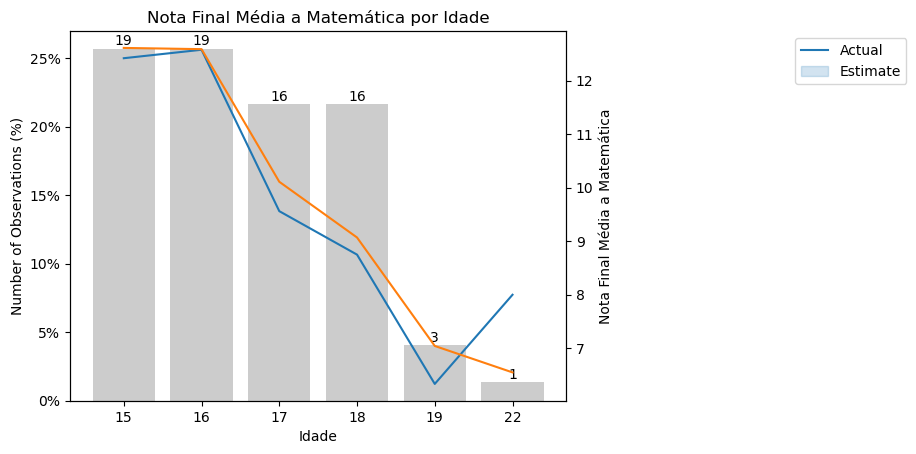

In [34]:
target_by_feature(x='age', target=['Actual', 'Estimate'], 
                  data=final_test, fun='mean', bins=None,
                  xlabel='Idade', ylabel='Nota Final Média a Matemática', 
                  title='Nota Final Média a Matemática por Idade', targetlabels=None, 
                  xrotation=None, show=True)

## Regressão Logística - Prever a Probabilidade de Sobrevivência

In [35]:
numeric_vars = titanic_df.dtypes[titanic_df.dtypes != 'object'].index.to_list()

In [46]:
X = titanic_df[numeric_vars].drop(['PassengerId', 'Pclass'], axis=1).dropna(axis=1) #passenger  id and pclass out
y = pd.get_dummies(titanic_df['Pclass'])[1] #1, 2 ou 3
y

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: 1, Length: 891, dtype: uint8

In [47]:
lm = sm.Logit(y, sm.add_constant(X))
res = lm.fit()
res.summary()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


d:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
d:\Users\user\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
d:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
d:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:592: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      1   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Tue, 18 Apr 2023   Pseudo R-squ.:                     inf
Time:                        19:14:04   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.5792      0.318    -14.401      0.000      -5.202      -3.956
Survived       0.5315      0.306      1.738      0.082      -0.068       1.131
SibSp         -2.8835      0.487     -5.921      0.000      -3.838      -1.929
Parch         -1.6190      0.386     -4.198      0.000      -2.375      -0.863
Fare           0.1578      0.013     11.992      0.000       0.132       0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.11 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [37]:
lm2 = LogisticRegression(random_state=123)
lm2.fit(X, y)
lm2.score(X, y)

0.6879910213243546

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(712, 4) (179, 4) (712,) (179,)


In [39]:
lm2.fit(X_train, y_train)
lm2.score(X_train, y_train)

0.6867977528089888

In [40]:
lm2.score(X_test, y_test)

0.6983240223463687

In [41]:
confusion_matrix(y_test, lm2.predict(X_test), labels=[1, 0])

array([[35, 30],
       [24, 90]], dtype=int64)

In [42]:
(35 + 90) / (35 + 90 + 24 + 30)

0.6983240223463687

In [43]:
y_pred = lm2.predict(X_test)

In [44]:
cm = ConfusionMatrix(y_test, lm2.predict(X_test))
cm.confusion_matrix.T

,Real Positive,Real Negative
Predicted Positive,35,24
Predicted Negative,30,90


In [45]:
cm.performance_measures

,Accuracy,Precision / PPV,Recall / Sensibility,NPV,Specificity
Performance Measures,0.698324,0.59322,0.538462,0.75,0.789474
